In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# 경고메세지 제거
import warnings
warnings.filterwarnings('ignore')

# 사용자 운영체제 확인
import os
os.name

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하기 
%config InlineBackend.figure_format = 'retina'


# 경기도지역 산사태 데이터 

# 2020년 강수량이 유독 높음  >산사태 피해 건수를 기준으로 분석

In [3]:
total  = pd.read_csv('(총정리)경기도산사태위험지역 데이터.csv', encoding ='UTF-8') 

In [4]:
total.columns

Index(['시군구', '2019년 평균 강수량', '2020년 평균 강수량', '2020년 태양광 부지 총면적', '시/군/구 면적',
       '지역별 터널 총 길이', '2018년도 직전 산지사방(보전) (ha)', '2018년도 직전  계류보전 (km)',
       '2018년도 직전  사방댐 (개)', '2019년도 직전  산지사방(보전) (ha)',
       '2019년도 직전  계류보전 (km)', '2019년도 직전  사방댐 (개)', '2020년 산사태피해면적',
       '2020년  발생건수'],
      dtype='object')

In [5]:
total['터널/면적']=total['지역별 터널 총 길이'].div(total['시/군/구 면적'])
total['터널/면적']

0      20.356643
1       6.952630
2      77.130919
3     291.974026
4      70.387471
5     108.258258
6     419.423077
7       2.740781
8      74.646802
9      82.528736
10      9.532710
11    264.161723
12     23.881090
13     18.468146
14     56.700767
15     26.928636
16     84.987212
17     69.822809
18     13.207246
19     28.818017
20      0.440633
21     17.447307
22     52.047530
23    153.148148
24    125.649510
25      6.192024
26     10.546075
27      3.812746
28     12.165921
29     37.010753
30      7.450587
Name: 터널/면적, dtype: float64

In [6]:
total

,시군구,2019년 평균 강수량,2020년 평균 강수량,2020년 태양광 부지 총면적,시/군/구 면적,지역별 터널 총 길이,2018년도 직전 산지사방(보전) (ha),2018년도 직전 계류보전 (km),2018년도 직전 사방댐 (개),2019년도 직전 산지사방(보전) (ha),2019년도 직전 계류보전 (km),2019년도 직전 사방댐 (개),2020년 산사태피해면적,2020년 발생건수,터널/면적
0,가평군,174.466667,382.500000,482828.040,843.7,17174.9,0.38,0.36,4.0,0.16,0.81,NaN,15.13,19.0,20.356643
1,고양시,180.333333,349.000000,47179.600,268.1,1864.0,0.00,0.15,NaN,0.33,NaN,NaN,NaN,NaN,6.952630
2,과천시,193.166667,388.666667,NaN,35.9,2769.0,0.10,NaN,1.0,NaN,0.13,1.0,NaN,NaN,77.130919
3,광명시,149.666667,326.666667,NaN,38.5,11241.0,NaN,0.20,NaN,0.40,0.10,1.0,NaN,NaN,291.974026
4,광주시,173.533333,358.666667,11604.000,431.0,30337.0,0.30,0.63,4.0,0.05,0.41,4.0,NaN,NaN,70.387471
5,구리시,181.933333,407.666667,NaN,33.3,3605.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.258258
6,군포시,146.833333,360.500000,660.000,36.4,15267.0,0.35,1.00,1.0,NaN,0.16,1.0,NaN,NaN,419.423077
7,김포시,106.700000,351.500000,NaN,276.6,758.1,NaN,0.21,1.0,0.20,0.35,1.0,0.55,3.0,2.740781
8,남양주시,187.333333,393.700000,NaN,458.1,34195.7,0.20,0.62,5.0,0.01,0.33,2.0,0.05,1.0,74.646802
9,동두천시,176.100000,378.133333,NaN,95.7,7898.0,NaN,NaN,NaN,NaN,0.49,3.0,NaN,NaN,82.528736


In [7]:
total = total.fillna(0)

In [8]:
total['2020년 태양광 부지 총면적']

0     482828.040
1      47179.600
2          0.000
3          0.000
4      11604.000
5          0.000
6        660.000
7          0.000
8          0.000
9          0.000
10         0.000
11         0.000
12     22729.000
13      2534.410
14         0.000
15         0.000
16         0.000
17         0.000
18    328387.748
19         0.000
20    990101.540
21         0.000
22         0.000
23         0.000
24         0.000
25         0.000
26         0.000
27         0.000
28         0.000
29         0.000
30         0.000
Name: 2020년 태양광 부지 총면적, dtype: float64

In [9]:
total.isnull().sum()

시군구                         0
2019년 평균 강수량                0
2020년 평균 강수량                0
2020년 태양광 부지 총면적            0
시/군/구 면적                    0
지역별 터널 총 길이                 0
2018년도 직전 산지사방(보전) (ha)     0
2018년도 직전  계류보전 (km)        0
2018년도 직전  사방댐 (개)          0
2019년도 직전  산지사방(보전) (ha)    0
2019년도 직전  계류보전 (km)        0
2019년도 직전  사방댐 (개)          0
2020년 산사태피해면적               0
2020년  발생건수                 0
터널/면적                       0
dtype: int64

In [10]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   시군구                       31 non-null     object 
 1   2019년 평균 강수량              31 non-null     float64
 2   2020년 평균 강수량              31 non-null     float64
 3   2020년 태양광 부지 총면적          31 non-null     float64
 4   시/군/구 면적                  31 non-null     float64
 5   지역별 터널 총 길이               31 non-null     float64
 6   2018년도 직전 산지사방(보전) (ha)   31 non-null     float64
 7   2018년도 직전  계류보전 (km)      31 non-null     float64
 8   2018년도 직전  사방댐 (개)        31 non-null     float64
 9   2019년도 직전  산지사방(보전) (ha)  31 non-null     float64
 10  2019년도 직전  계류보전 (km)      31 non-null     float64
 11  2019년도 직전  사방댐 (개)        31 non-null     float64
 12  2020년 산사태피해면적             31 non-null     float64
 13  2020년  발생건수               31 non-null     float64
 14  터널/면적       

# Train / Test 나누기 (첫번째시도)>'2020년 산사태  발생건수'

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = total[['2020년 평균 강수량','2020년 태양광 부지 총면적', '터널/면적']]

In [13]:
y = total['2020년  발생건수']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

# 모델 만들기

In [15]:
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train).fit()  

In [16]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            2020년  발생건수   R-squared (uncentered):                   0.205
Model:                            OLS   Adj. R-squared (uncentered):              0.092
Method:                 Least Squares   F-statistic:                              1.810
Date:                Fri, 26 Aug 2022   Prob (F-statistic):                       0.176
Time:                        17:11:14   Log-Likelihood:                         -104.29
No. Observations:                  24   AIC:                                      214.6
Df Residuals:                      21   BIC:                                      218.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
2020년 평균 강수량         0.0266      0.015      1.745      0.096      -0.005       0.058
2020년 태양광 부지 총면적  1.507e-05   1.94e-05      0.778      0.445   -2.52e-05    5.53e-05
터널/면적               -0.0345      0.041     -0.848      0.406      -0.119       0.050
==============================================================================
Omnibus:                       52.330   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.647
Skew:                           3.930   Prob(JB):                     5.69e-63
Kurtosis:                      17.995   Cond. No.                     2.32e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Train / Test 나누기 (두번째)>'2020년 산사태 피해면적'

In [17]:
from sklearn.model_selection import train_test_split
X = total[['2020년 평균 강수량','2020년 태양광 부지 총면적', '터널/면적']]
y = total['2020년 산사태피해면적']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

In [18]:
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train).fit()  
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          2020년 산사태피해면적   R-squared (uncentered):                   0.126
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              1.014
Date:                Fri, 26 Aug 2022   Prob (F-statistic):                       0.406
Time:                        17:11:17   Log-Likelihood:                         -99.918
No. Observations:                  24   AIC:                                      205.8
Df Residuals:                      21   BIC:                                      209.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
2020년 평균 강수량         0.0199      0.013      1.565      0.133      -0.007       0.046
2020년 태양광 부지 총면적  1.558e-06   1.61e-05      0.097      0.924    -3.2e-05    3.51e-05
터널/면적               -0.0262      0.034     -0.773      0.448      -0.097       0.044
==============================================================================
Omnibus:                       53.805   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.889
Skew:                           4.048   Prob(JB):                     6.92e-69
Kurtosis:                      18.759   Cond. No.                     2.32e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 정확도가 떨어짐> 평준화

# 모든 특성을 같은 기준으로 평준화(-1~1)>StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
standard = StandardScaler()

In [21]:
data = total.drop('시군구', axis=1)

In [22]:
standard.fit(data)

StandardScaler()

In [23]:
scaled_st = standard.transform(data)

In [24]:
tmp = pd.DataFrame(scaled_st, columns = data.columns)

In [25]:
tmp.head(2)

,2019년 평균 강수량,2020년 평균 강수량,2020년 태양광 부지 총면적,시/군/구 면적,지역별 터널 총 길이,2018년도 직전 산지사방(보전) (ha),2018년도 직전 계류보전 (km),2018년도 직전 사방댐 (개),2019년도 직전 산지사방(보전) (ha),2019년도 직전 계류보전 (km),2019년도 직전 사방댐 (개),2020년 산사태피해면적,2020년 발생건수,터널/면적
0,0.897122,0.630198,2.136467,1.847890,0.611446,0.795374,0.148055,1.237450,0.216316,1.114743,-0.690066,0.646175,0.588246,-0.528833
1,1.132399,-0.472825,-0.069158,-0.230931,-0.874450,-0.533634,-0.381527,-0.781548,0.829210,-0.795919,-0.690066,-0.358784,-0.427815,-0.670991


# 다시Train Test Split 시도

In [42]:
from sklearn.model_selection import train_test_split
X = tmp[['2020년 평균 강수량','2020년 태양광 부지 총면적', '터널/면적']]
y = tmp['2020년 산사태피해면적']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

In [27]:
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train).fit()  
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          2020년 산사태피해면적   R-squared (uncentered):                   0.063
Model:                            OLS   Adj. R-squared (uncentered):             -0.071
Method:                 Least Squares   F-statistic:                             0.4690
Date:                Fri, 26 Aug 2022   Prob (F-statistic):                       0.707
Time:                        17:11:27   Log-Likelihood:                         -34.560
No. Observations:                  24   AIC:                                      75.12
Df Residuals:                      21   BIC:                                      78.65
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
2020년 평균 강수량         0.2061      0.238      0.865      0.397      -0.289       0.701
2020년 태양광 부지 총면적     0.0138      0.209      0.066      0.948      -0.422       0.449
터널/면적               -0.1419      0.211     -0.674      0.508      -0.580       0.296
==============================================================================
Omnibus:                       52.867   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.351
Skew:                           3.962   Prob(JB):                     9.93e-66
Kurtosis:                      18.381   Cond. No.                         1.32
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
from sklearn.model_selection import train_test_split
X = tmp[['2020년 평균 강수량','2020년 태양광 부지 총면적', '터널/면적']]
#y = tmp['2020년 산사태피해면적']
y = tmp['2020년  발생건수']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

In [29]:
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train).fit()  
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            2020년  발생건수   R-squared (uncentered):                   0.112
Model:                            OLS   Adj. R-squared (uncentered):             -0.015
Method:                 Least Squares   F-statistic:                             0.8843
Date:                Fri, 26 Aug 2022   Prob (F-statistic):                       0.465
Time:                        17:11:28   Log-Likelihood:                         -33.673
No. Observations:                  24   AIC:                                      73.35
Df Residuals:                      21   BIC:                                      76.88
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
2020년 평균 강수량         0.2176      0.229      0.948      0.354      -0.260       0.695
2020년 태양광 부지 총면적     0.1522      0.202      0.755      0.459      -0.267       0.572
터널/면적               -0.1502      0.203     -0.740      0.467      -0.572       0.272
==============================================================================
Omnibus:                       51.358   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.915
Skew:                           3.838   Prob(JB):                     3.31e-60
Kurtosis:                      17.662   Cond. No.                         1.32
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 정확도상승

# Random Forest Regressor로 확률 예측하기

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rf = RandomForestRegressor(max_depth = 10, random_state = 100)

In [32]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=100)

In [33]:
pred = rf.predict(X_test)

In [34]:
y_test  # 발생건수를 0과 1로 이진분류 


13   -0.427815
27   -0.374338
1    -0.427815
25    1.978645
5    -0.427815
18    0.427815
28   -0.160431
Name: 2020년  발생건수, dtype: float64

 # 발생건수를 0과 1로 이진분류 해보겠음

In [35]:
def conv(x):
    if x >= 0.5:
        return 1
    else:
        return 0

In [36]:
pd_result_pred = pd.Series(pred).apply(lambda x: conv(x))

In [37]:
pd_result_real = pd.Series(y_test).apply(lambda x: conv(x))

# 평가

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(pd_result_real, pd_result_pred)

1.0

In [40]:
rf.feature_importances_

array([0.5091416 , 0.21776801, 0.27309039])

<AxesSubplot:>

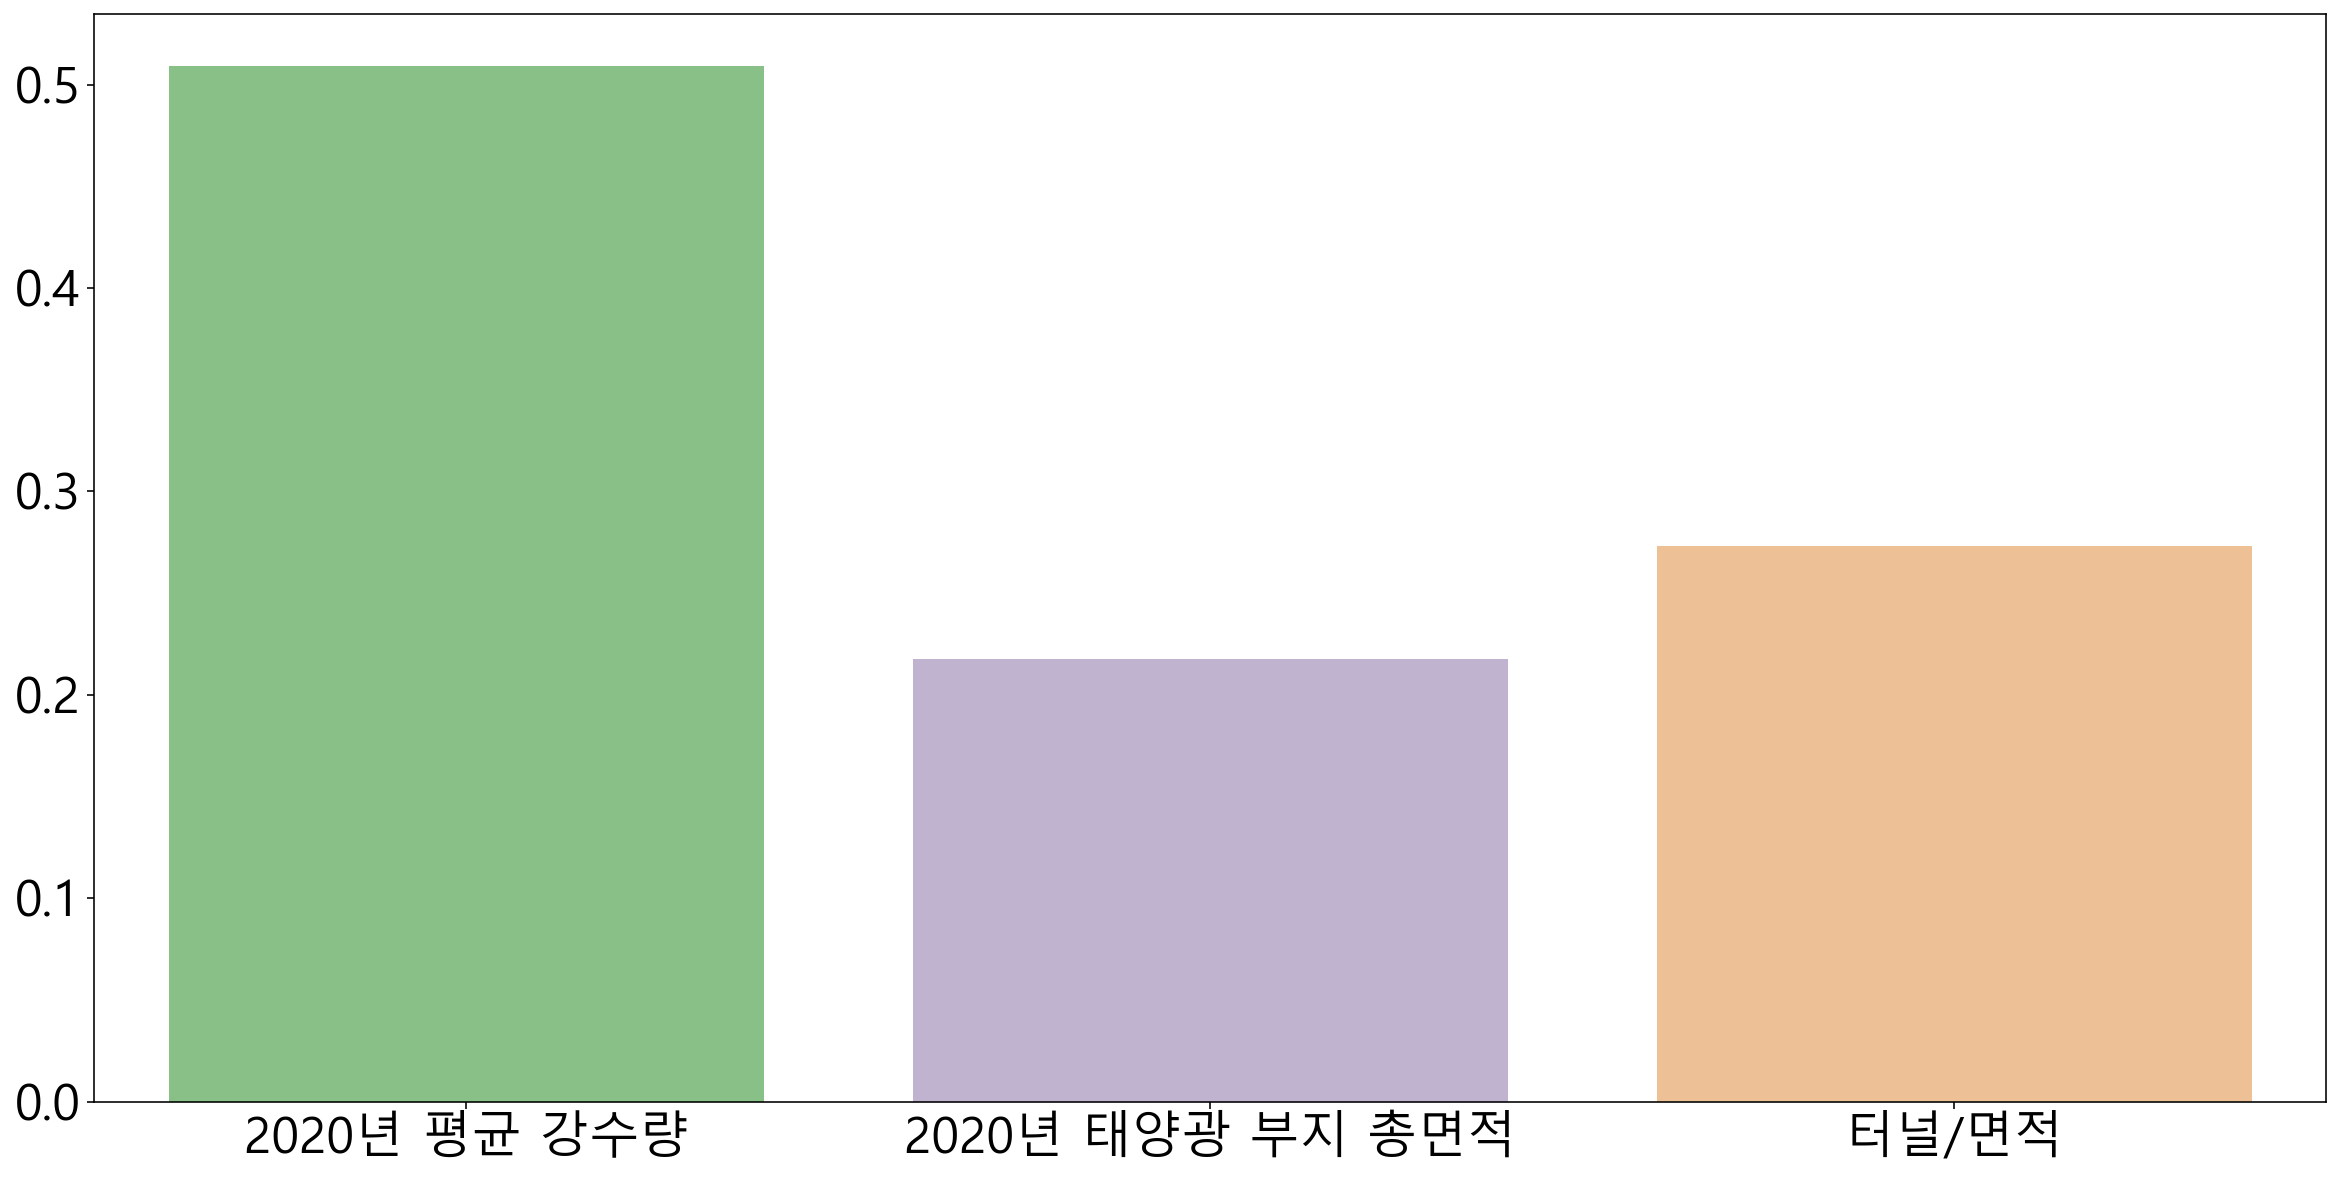

In [41]:
plt.figure(figsize=(20,10))

plt.rc('font', size=25)        # 기본 폰트 크기
sns.barplot(x = X_train.columns, y = rf.feature_importances_,palette='Accent')